In [1]:
import matplotlib.pyplot as plt
import pandas
import scipy.stats
import numpy as np

Conditions portant sur les prénoms retenus

1. Sur la période allant de 1900 à 1945, le prénom a été attribué au moins 20 fois à des personnes de sexe féminin et/ou au moins 20 fois à des personnes de sexe masculin
2. Sur la période allant de 1946 à 2019, le prénom a été attribué au moins 20 fois à des personnes de sexe féminin et/ou au moins 20 fois à des personnes de sexe masculin
3. Pour une année de naissance donnée, le prénom a été attribué au moins 3 fois à des personnes de sexe féminin ou de sexe masculin

Les effectifs des prénoms ne remplissant pas les conditions 1 et 2 sont regroupés (pour chaque sexe et chaque année de naissance) 
dans un enregistrement dont le champ prénom (PREUSUEL) prend la valeur «_PRENOMS_RARES_». 
Les effectifs des prénoms remplissant la condition 2 mais pas la condition 3 sont regroupés (pour chaque sexe et chaque prénom) dans 
un enregistrement dont le champ année de naissance (ANNAIS) prend la valeur «XXXX».

In [2]:
# lecture du csv et affichage
prenoms = pandas.read_csv("Prénoms/nat2019.csv", header = 0, sep = ";")
prenoms

sexe        preusuel annais  nombre
0          1  _PRENOMS_RARES   1900    1250
1          1  _PRENOMS_RARES   1901    1340
2          1  _PRENOMS_RARES   1902    1329
3          1  _PRENOMS_RARES   1903    1285
4          1  _PRENOMS_RARES   1904    1427
...      ...             ...    ...     ...
652051     2           ZYNEB   2016       6
652052     2           ZYNEB   2017       6
652053     2           ZYNEB   2018       5
652054     2           ZYNEB   2019       7
652055     2           ZYNEB   XXXX      19

[652056 rows x 4 columns]

Note : 1 = homme, 2 = femme

# Un exemple de recherche de prénom selon l'année

In [6]:
def search(name, year):
    result = [0,0]
    for i in range(652056):
        if prenoms['preusuel'][i] == name:
            if prenoms['annais'][i] == year:
                result[prenoms['sexe'][i] - 1] = prenoms['nombre'][i]
    return result

research = 'KEVIN', '1986'

result = search(research[0], research[1])

print("Il y a eu " + str(result[0]) + " garçon(s) nommé(s) " + research[0] + " en " + research[1] + ".")
print("Il y a eu " + str(result[1]) + " fille(s) nommée(s) " + research[0] + " en " + research[1] + ".")


Il y a eu 4875 garçon(s) nommé(s) KEVIN en 1986.
Il y a eu 3 fille(s) nommée(s) KEVIN en 1986.


# Une approche simpliste

## Affichage de la courbe d'évolution des prénoms au cours du temps

In [31]:
def plotNumberByYear(dataBase, names):
    X = np.array([x for x in range(1900,2020)])
    YF = np.zeros((121))
    YM = np.zeros((121))
    for name in names:
        isName = dataBase['preusuel']==name
        allName = dataBase[isName]

        allName = allName.replace('XXXX', '2050')



        allName['annais'] = allName['annais'].astype(int)

        X_M = [x for x in allName[allName.sexe==1].annais.array]
        Y_M = [y for y in allName[allName.sexe==1].nombre.array]
        X_F = [x for x in allName[allName.sexe==2].annais.array]
        Y_F = [y for y in allName[allName.sexe==2].nombre.array]

        for i in range(1900,2020):
            if not i in X_M:
                Y_M.insert(i-1900, 0)
            if not i in X_F:
                Y_F.insert(i-1900, 0)
        X = [i for i in range(1900, 2020)]
        if not 2050 in X_M :
            Y_M.append(0)
        if not 2050 in X_F :
            Y_F.append(0)

        YF += Y_F
        YM += Y_M


    males, = plt.plot(X, YM[:-1])
    females, = plt.plot(X, YF[:-1])
    plt.legend([males, females], ['hommes', 'femmes'])
    if len(names) == 1 :
        plt.title("Nombre de bébés nommés " + names[0] + " chaque année entre 1900 et 2020.")
        if YM[-1] != 0 :
            print("Le prénom " + names[0] + " a été donné " + str(YM[-1]) + " fois à des hommes pour des années indéfinies")
        if YF[-1] != 0 :
            print("Le prénom " + names[0] + " a été donné " + str(YF[-1]) + " fois à des femmes pour des années indéfinies")
    
    elif len(names) > 10 :
        plt.title("Nombre de bébés nommés " + names[0] + ",... chaque année entre 1900 et 2020.")
        if YM[-1] != 0 :
            print("Les prénoms " + names[0] + ",... ont été donnés " + str(YM[-1]) + " fois à des hommes pour des années indéfinies")
        if YF[-1] != 0 :
            print("Les prénoms " + names[0] + ",... ont été donnés " + str(YF[-1]) + " fois à des femmes pour des années indéfinies")
    else :
        plt.title("Nombre de bébés nommés " + names[0] + ",... chaque année entre 1900 et 2020.")
        if YM[-1] != 0 :
            print("Les prénoms ", end ='')
            for name in names :
                print(name + " ", end = '')
            print("ont été donnés " + str(YM[-1]) + " fois à des hommes pour des années indéfinies")
        if YF[-1] != 0 :
            print("Les prénoms ", end = '')
            for name in names :
                print(name + " ", end = '')
            print("ont été donnés " + str(YF[-1]) + " fois à des femmes pour des années indéfinies")


## Quelques ensembles de prénoms 

Traitement de la base de donnée des prénoms intéressants:


Le prénom ZIDANE a été donné 31.0 fois à des hommes pour des années indéfinies




Les prénoms MICHAEL MICKAEL ont été donnés 36.0 fois à des hommes pour des années indéfinies
Les prénoms MICHAEL MICKAEL ont été donnés 27.0 fois à des femmes pour des années indéfinies


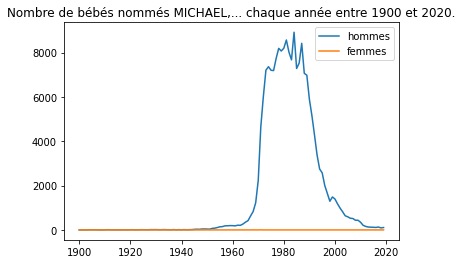



Les prénoms AURELIEN AURÉLIEN ont été donnés 17.0 fois à des hommes pour des années indéfinies
Les prénoms AURELIEN AURÉLIEN ont été donnés 52.0 fois à des femmes pour des années indéfinies


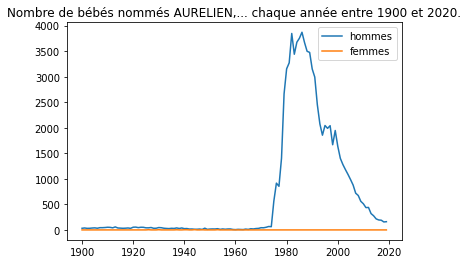



Le prénom DAVID a été donné 64.0 fois à des femmes pour des années indéfinies







Traitement de la base de donnée des prénoms de zoomers:


Les prénoms MATTHIEU MATHIEU MATHIEUX ont été donnés 59.0 fois à des hommes pour des années indéfinies
Les prénoms MATTHIEU MATHIEU MATHIEUX ont été donnés 62.0 fois à des femmes pour des années indéfinies




Le prénom MANON a été donné 20.0 fois à des hommes pour des années indéfinies
Le prénom MANON a été donné 19.0 fois à des femmes pour des années indéfinies




Le prénom ENZO a été donné 20.0 fois à des hommes pour des années indéfinies
Le prénom ENZO a été donné 27.0 fois à des femmes pour des années indéfinies




Le prénom QUENTIN a été donné 44.0 fois à des hommes pour des années indéfinies
Le prénom QUENTIN a été donné 21.0 fois à des femmes pour des années indéfinies







Traitement de la base de donnée des prénoms de la génération des grands-parents:


Le prénom JEAN a été donné 34.0 fois à des femmes pour des années indéfinies




Le prénom JACQUES a été donné 43.0 fois à des femmes pour des années indéfinies


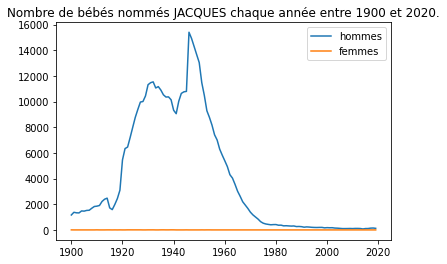






Traitement de la base de donnée des prénoms à nouveau à la mode:


Le prénom LOUIS a été donné 61.0 fois à des femmes pour des années indéfinies


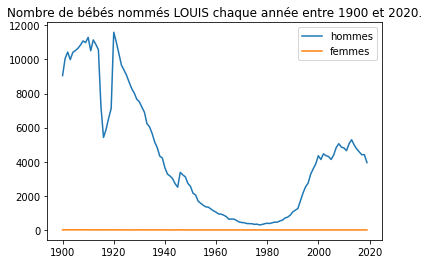



Les prénoms LOUISE LOUISON ont été donnés 50.0 fois à des hommes pour des années indéfinies
Les prénoms LOUISE LOUISON ont été donnés 52.0 fois à des femmes pour des années indéfinies


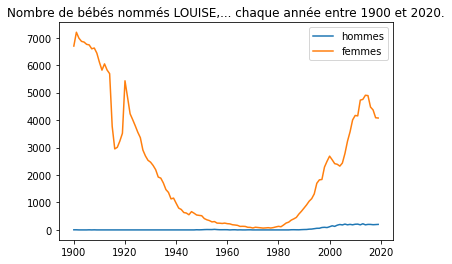



Le prénom ALICE a été donné 42.0 fois à des hommes pour des années indéfinies




Le prénom JULES a été donné 89.0 fois à des femmes pour des années indéfinies







Traitement de la base de donnée des prénoms des gens uniques:




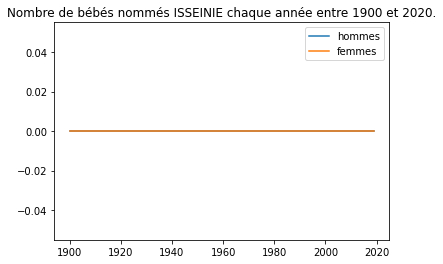



Les prénoms PHILEMON PHILÉMON ont été donnés 57.0 fois à des hommes pour des années indéfinies


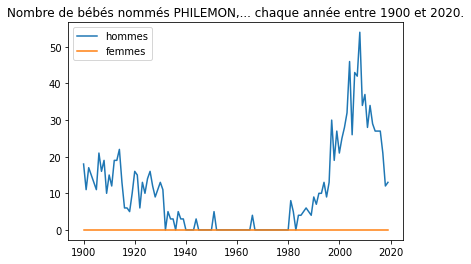



Le prénom LUDMILA a été donné 34.0 fois à des femmes pour des années indéfinies


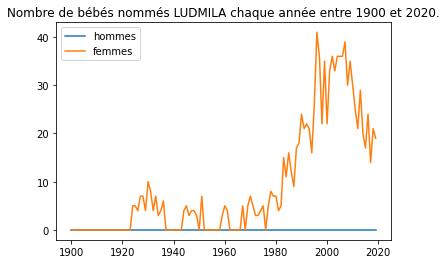

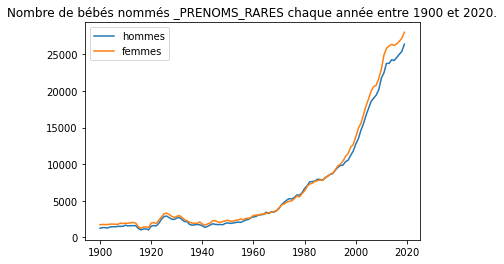






Traitement de la base de donnée des prénoms des méchants:


Le prénom ADOLF a été donné 23.0 fois à des hommes pour des années indéfinies


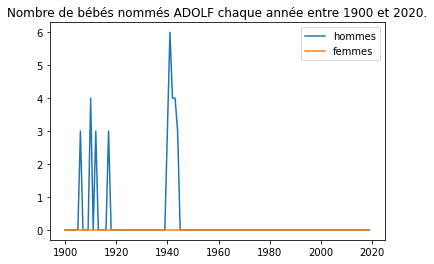



Le prénom JOSEPH a été donné 36.0 fois à des femmes pour des années indéfinies


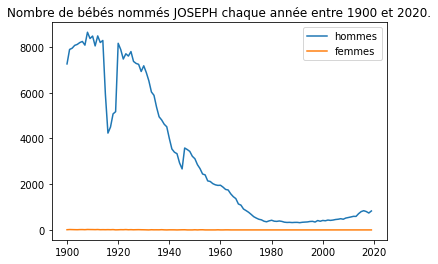






Traitement de la base de donnée des prénoms des boomers:




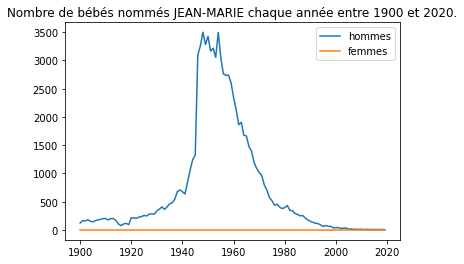



Le prénom JEAN-JACQUES a été donné 3.0 fois à des hommes pour des années indéfinies


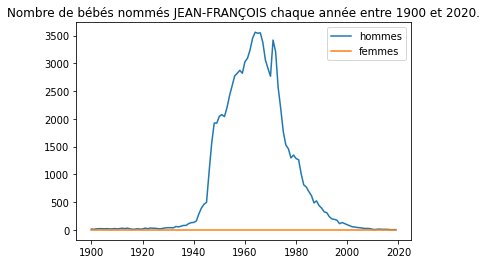

In [33]:
interesting = [["ZIDANE"], ["MICHAEL", "MICKAEL"], ["AURELIEN", "AURÉLIEN"], ["DAVID"]]
zoomers = [["MATTHIEU", "MATHIEU", "MATHIEUX"],  ["MANON"], ["ENZO"], ["QUENTIN"]]
grandsparents = [["JEAN"], ["JACQUES"]]
fashionAgain = [["LOUIS"], ["LOUISE", "LOUISON"], ["ALICE"], ["JULES"]]
lonely = [["ISSEINIE"], ["PHILEMON", "PHILÉMON"], ["LUDMILA"], ["_PRENOMS_RARES"]]
dictateurs = [["ADOLF"], ["JOSEPH"]]
boomers = [["JEAN-MARIE"], ["JEAN-JACQUES"], ["JEAN-FRANÇOIS"]]

databases = [interesting, zoomers, grandsparents, fashionAgain, lonely, dictateurs, boomers]
databasesNames = ["intéressants", "de zoomers", "de la génération des grands-parents", "à nouveau à la mode", "des gens uniques", "des méchants", "des boomers"]
for i in range(len(databases)) :
    print("Traitement de la base de donnée des prénoms " + databasesNames[i] + ":\n\n")
    for prenom in databases[i] :
        plotNumberByYear(prenoms, prenom)
        plt.show()
        print("\n")
    print("\n\n")

# Une approche plus judicieuse 

## Affichage de la part des prénoms au cours du temps

In [26]:
def plotPartByYear(dataBase, name):

    isName = dataBase['preusuel']==name
    allName = dataBase[isName]

    allName = allName.replace('XXXX', '2050')



    allName['annais'] = allName['annais'].astype(int)

    X_M = allName[allName.sexe==1].annais.array
    Y_M = allName[allName.sexe==1].nombre.array
    X_F = allName[allName.sexe==2].annais.array
    Y_F = allName[allName.sexe==2].nombre.array

    for i in range(1900,2020):
        if not i in X_M:
            Y_M = np.insert(Y_M, i-1900, 0)
        if not i in X_F:
            Y_F = np.insert(Y_F, i-1900, 0)
    X = [i for i in range(1900, 2020)]
    if not 2050 in X_M :
        Y_M = np.append(Y_M, 0)
    if not 2050 in X_F :
        Y_F = np.append(Y_F, 0)
    
    Y_M = Y_M.astype(float)
    Y_F = Y_F.astype(float)
    for year in X :
        totalYear = dataBase[dataBase.annais==str(year)].nombre.array.sum()
        Y_M[year-1900] /= totalYear
        Y_F[year-1900] /= totalYear

    males, = plt.plot(X, Y_M[:-1], c = 'blue')
    females, = plt.plot(X, Y_F[:-1], c = 'red')
    plt.legend([males, females], ['hommes', 'femmes'])
    plt.title("Nombre de bébés nommés " + name + " chaque année entre 1900 et 2020.")
    if Y_M[-1] != 0 :
        print("Le prénom " + name + " a été donné " + str(Y_M[-1]) + " fois à des hommes pour des années indéfinies")
    if Y_F[-1] != 0 :
        print("Le prénom " + name + " a été donné " + str(Y_F[-1]) + " fois à des femmes pour des années indéfinies")
plotPartByYear(prenoms, "LOUIS")

Le prénom LOUIS a été donné 61.0 fois à des femmes pour des années indéfinies


Il y a eu 821477 bébés lors d'années indéfinies


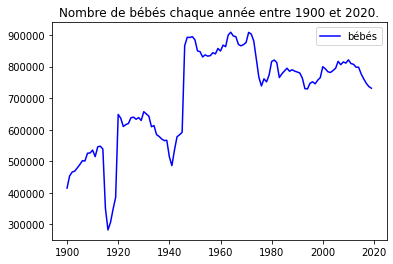

In [8]:
def plotTotalByYear(dataBase):

    X = np.array([x for x in range(1900, 2020)])
    Y_M = np.array([dataBase[dataBase.annais==str(year)].nombre.array.sum() for year in X])


    males, = plt.plot(X, Y_M, c = 'blue')
    plt.legend([males], ['bébés'])
    plt.title("Nombre de bébés chaque année entre 1900 et 2020.")
    print("Il y a eu " + str(dataBase[dataBase.annais=="XXXX"].nombre.array.sum()) + " bébés lors d'années indéfinies")

plotTotalByYear(prenoms)

(1900.0, 2019.0, 0.0, 1000000.0)

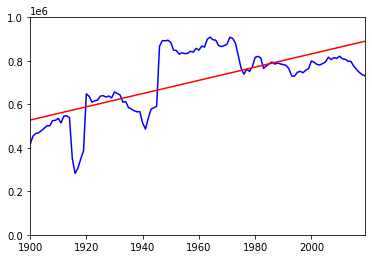

In [33]:
X = np.array([[x] for x in range(1900,2020)])
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
XTX = np.dot(X.T, X)
Y = np.array([prenoms[prenoms.annais==str(x)].nombre.array.sum() for x in range(1900,2020)])
XTY = np.dot(X.T, Y)
A = np.linalg.solve(XTX, XTY)
quadError = np.sqrt(((X.dot(A)-Y)**2).mean())

plt.plot(X,Y,c='blue')
plt.plot(X,A[0] + A[1]*X,c='red')
plt.axis([1900,2019,0,1000000])

In [56]:
def plotPartByYearList(dataBase, names):
    X = np.array([x for x in range(1900,2020)])
    YF = np.zeros((121))
    YM = np.zeros((121))
    for name in names:
        isName = dataBase['preusuel']==name
        allName = dataBase[isName]

        allName = allName.replace('XXXX', '2050')



        allName['annais'] = allName['annais'].astype(int)

        X_M = allName[allName.sexe==1].annais.array
        Y_M = allName[allName.sexe==1].nombre.array
        X_F = allName[allName.sexe==2].annais.array
        Y_F = allName[allName.sexe==2].nombre.array

        for i in range(1900,2020):
            if not i in X_M:
                Y_M = np.insert(Y_M, i-1900, 0)
            if not i in X_F:
                Y_F = np.insert(Y_F, i-1900, 0)
        if not 2050 in X_M :
            Y_M = np.append(Y_M, 0)
        if not 2050 in X_F :
            Y_F = np.append(Y_F, 0)
    
        Y_M = Y_M.astype(float)
        Y_F = Y_F.astype(float)
        for year in X :
            totalYear = dataBase[dataBase.annais==str(year)].nombre.array.sum()
            Y_M[year-1900] /= totalYear
            Y_F[year-1900] /= totalYear

        YF += Y_F
        YM += Y_M

    males, = plt.plot(X, YM[:-1], c = 'blue')
    females, = plt.plot(X, YF[:-1], c = 'red')
    plt.legend([males, females], ['hommes', 'femmes'])
    if len(names) == 1 :
        plt.title("Nombre de bébés nommés " + names[0] + " chaque année entre 1900 et 2020.")
        if YM[-1] != 0 :
            print("Le prénom " + names[0] + " a été donné " + str(YM[-1]) + " fois à des hommes pour des années indéfinies")
        if YF[-1] != 0 :
            print("Le prénom " + names[0] + " a été donné " + str(YF[-1]) + " fois à des femmes pour des années indéfinies")
    
    elif len(names) > 10 :
        plt.title("Nombre de bébés nommés " + names[0] + ",... chaque année entre 1900 et 2020.")
        if YM[-1] != 0 :
            print("Les prénoms " + names[0] + ",... ont été donnés " + str(YM[-1]) + " fois à des hommes pour des années indéfinies")
        if YF[-1] != 0 :
            print("Les prénoms " + names[0] + ",... ont été donnés " + str(YF[-1]) + " fois à des femmes pour des années indéfinies")
    else :
        plt.title("Nombre de bébés nommés " + names[0] + ",... chaque année entre 1900 et 2020.")
        if YM[-1] != 0 :
            print("Les prénoms ", end ='')
            for name in names :
                print(name + " ", end = '')
            print("ont été donnés " + str(YM[-1]) + " fois à des hommes pour des années indéfinies")
        if YF[-1] != 0 :
            print("Les prénoms ", end = '')
            for name in names :
                print(name + " ", end = '')
            print("ont été donnés " + str(YF[-1]) + " fois à des femmes pour des années indéfinies")

## Les mêmes exemples

Traitement de la base de donnée des prénoms intéressants:


Le prénom ZIDANE a été donné 31.0 fois à des hommes pour des années indéfinies




Les prénoms MICHAEL MICKAEL ont été donnés 36.0 fois à des hommes pour des années indéfinies
Les prénoms MICHAEL MICKAEL ont été donnés 27.0 fois à des femmes pour des années indéfinies


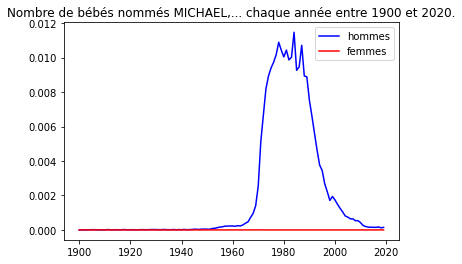



Les prénoms AURELIEN AURÉLIEN ont été donnés 17.0 fois à des hommes pour des années indéfinies
Les prénoms AURELIEN AURÉLIEN ont été donnés 52.0 fois à des femmes pour des années indéfinies


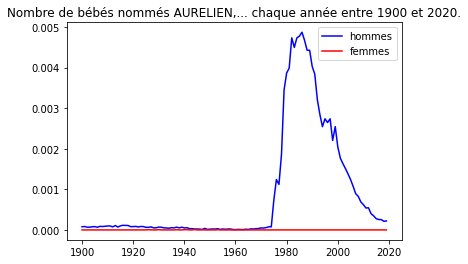



Le prénom DAVID a été donné 64.0 fois à des femmes pour des années indéfinies


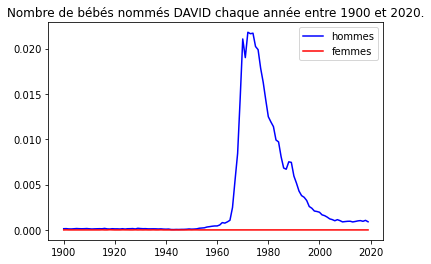






Traitement de la base de donnée des prénoms de zoomers:


Les prénoms MATTHIEU MATHIEU MATHIEUX ont été donnés 59.0 fois à des hommes pour des années indéfinies
Les prénoms MATTHIEU MATHIEU MATHIEUX ont été donnés 62.0 fois à des femmes pour des années indéfinies


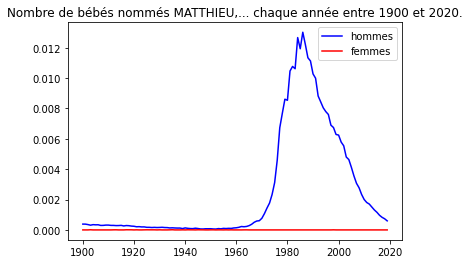



Le prénom MANON a été donné 20.0 fois à des hommes pour des années indéfinies
Le prénom MANON a été donné 19.0 fois à des femmes pour des années indéfinies


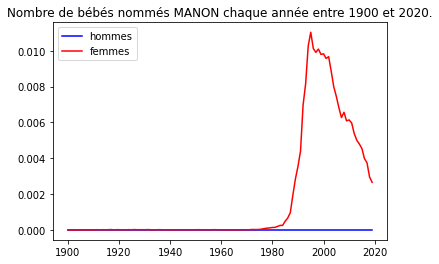



Le prénom ENZO a été donné 20.0 fois à des hommes pour des années indéfinies
Le prénom ENZO a été donné 27.0 fois à des femmes pour des années indéfinies


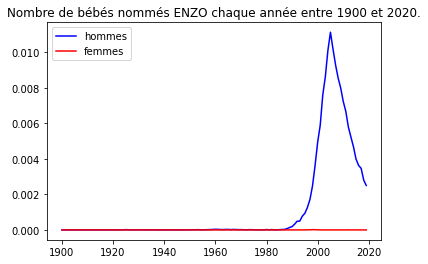



Le prénom QUENTIN a été donné 44.0 fois à des hommes pour des années indéfinies
Le prénom QUENTIN a été donné 21.0 fois à des femmes pour des années indéfinies


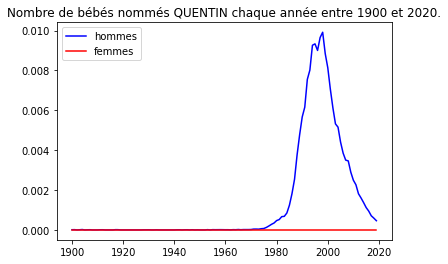






Traitement de la base de donnée des prénoms de la génération des grands-parents:


Le prénom JEAN a été donné 34.0 fois à des femmes pour des années indéfinies


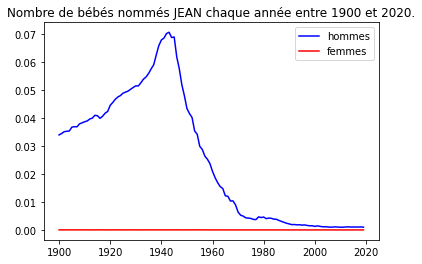



Le prénom JACQUES a été donné 43.0 fois à des femmes pour des années indéfinies


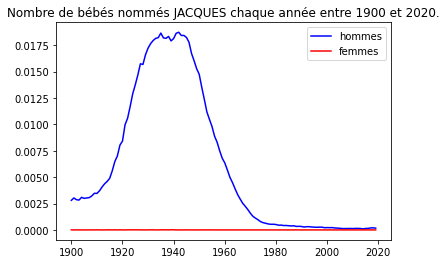






Traitement de la base de donnée des prénoms à nouveau à la mode:


Le prénom LOUIS a été donné 61.0 fois à des femmes pour des années indéfinies


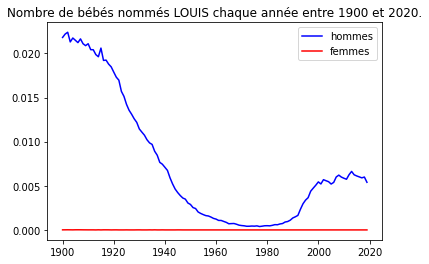



Les prénoms LOUISE LOUISON ont été donnés 50.0 fois à des hommes pour des années indéfinies
Les prénoms LOUISE LOUISON ont été donnés 52.0 fois à des femmes pour des années indéfinies


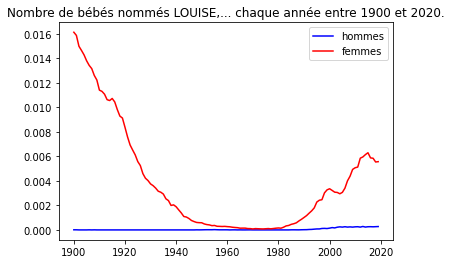



Le prénom ALICE a été donné 42.0 fois à des hommes pour des années indéfinies


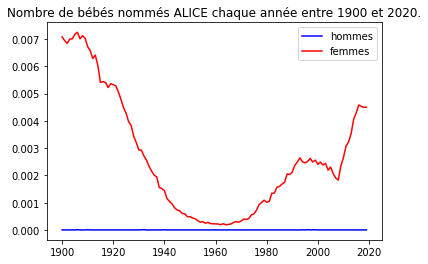



Le prénom JULES a été donné 89.0 fois à des femmes pour des années indéfinies


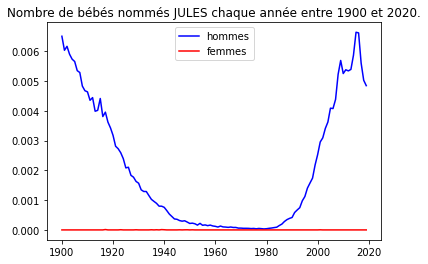






Traitement de la base de donnée des prénoms des gens uniques:




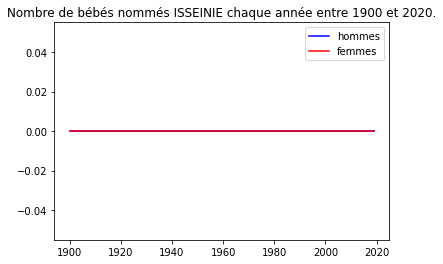



Les prénoms PHILEMON PHILÉMON ont été donnés 57.0 fois à des hommes pour des années indéfinies


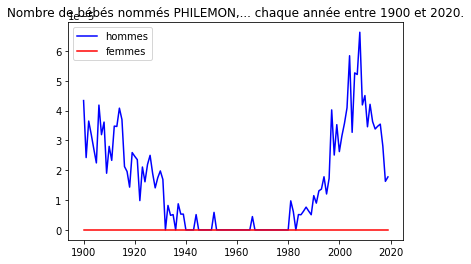



Le prénom LUDMILA a été donné 34.0 fois à des femmes pour des années indéfinies


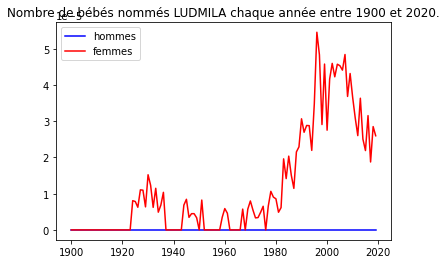

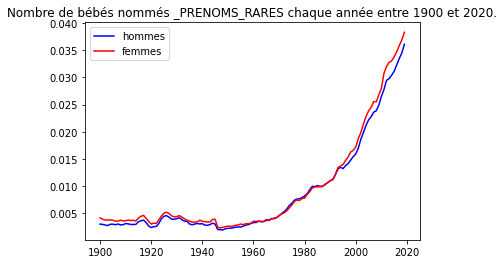






Traitement de la base de donnée des prénoms des méchants:


Le prénom ADOLF a été donné 23.0 fois à des hommes pour des années indéfinies


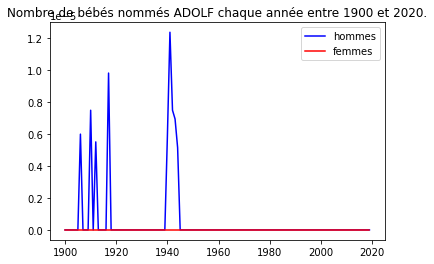



Le prénom JOSEPH a été donné 36.0 fois à des femmes pour des années indéfinies


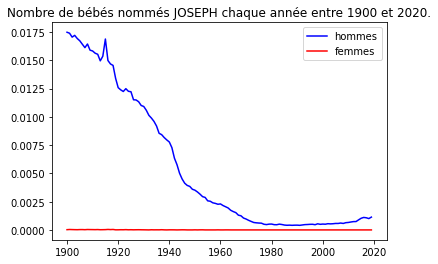






Traitement de la base de donnée des prénoms des boomers:




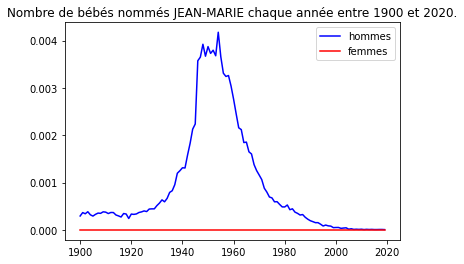



Le prénom JEAN-JACQUES a été donné 3.0 fois à des hommes pour des années indéfinies


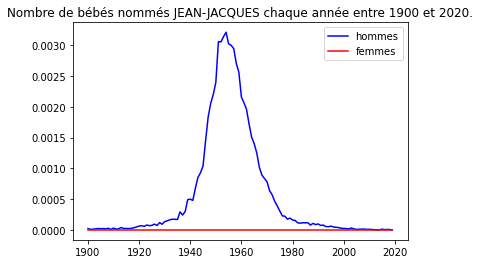

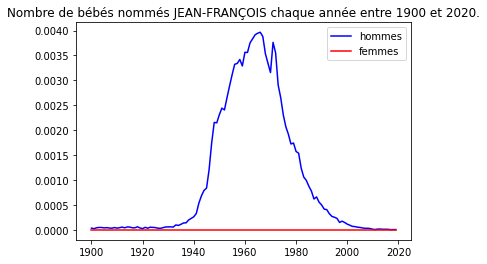

In [57]:
for i in range(len(databases)) :
    print("Traitement de la base de donnée des prénoms " + databasesNames[i] + ":\n\n")
    for prenom in databases[i] :
        plotPartByYearList(prenoms, prenom)
        plt.show()
        print("\n")
    print("\n\n")

# Une approximation des courbes

## Matching-pursuit

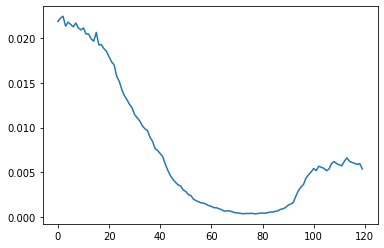

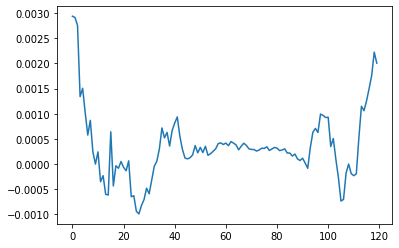

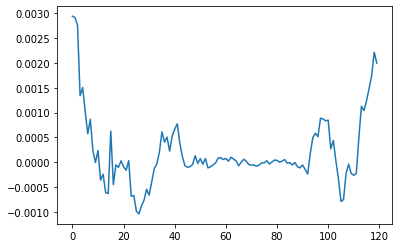

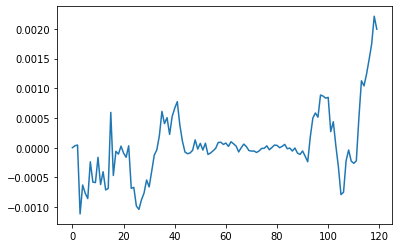

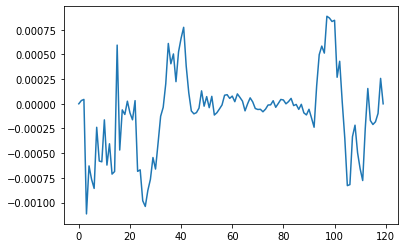

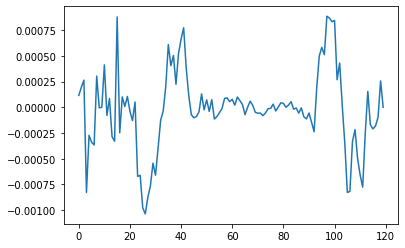

(array([249, 228, 306,   0, 119,   9,  27,  37]),
 array([ 1.04673677,  0.15561226,  0.01777887,  0.0368165 ,  0.02501132,
        -0.00736251, -0.01098237,  0.00781512]))

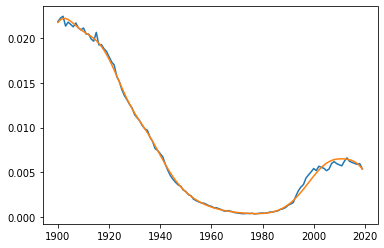

In [4]:
def prod_scal(f, D):
    D2 = D.copy()
    ret = np.zeros(D2.shape[0])
    for i in range(D2.shape[0]):
        i_m_n = np.argmax(D2[i])
        a_n = f[i_m_n]/D2[i][i_m_n]
        D2[i] = np.abs(f - a_n*D2[i])
        ret[i] += D2[i].sum()
    return ret

def matching_pursuit(f, dictionary, epsilon=1e-4, it_limit=10):
    d = dictionary.copy()
    cste = np.mean(f)
    f_appro = f
    n = 0
    res_index = np.array([], dtype=int)
    res_coeff = np.array([])
    while np.max(f_appro) > epsilon and n < it_limit :
        i_max = np.argmin(prod_scal(f_appro, d))
        plt.plot(f_appro)
        plt.show()
        if i_max in res_index :
            return res_index, res_coeff, cste
        i_m_n = np.argmax(d[i_max])
        a_n = f_appro[i_m_n]/d[i_max][i_m_n]
        f_appro = f_appro - a_n*d[i_max]
        res_index = np.append(res_index, i_max)
        res_coeff = np.append(res_coeff, a_n)
        n += 1
    return res_index, res_coeff, cste

def loi_nor_cent_red(x, center, ecart_type):
    return np.exp(-((x-center)/ecart_type)**2 /2)/(ecart_type*np.sqrt(2*np.pi))

def init_dictionary():
    res_dic = []
    n = 0
    for i in range(120):
        n += 1
        for x in range(120):
            res_dic.append(loi_nor_cent_red(x, i, 5))
    for i in range(120):
        n += 1
        for x in range(120):
            res_dic.append(loi_nor_cent_red(x, i, 10))
    for i in range(120):
        n += 1
        for x in range(120):
            res_dic.append(loi_nor_cent_red(x, i, 20))
    return np.array(res_dic).reshape((n,120))

def extractPartByYear(dataBase, names):
    X = np.array([x for x in range(1900,2020)])
    YF = np.zeros((121))
    YM = np.zeros((121))
    for name in names:
        isName = dataBase['preusuel']==name
        allName = dataBase[isName]

        allName = allName.replace('XXXX', '2050')



        allName['annais'] = allName['annais'].astype(int)

        X_M = allName[allName.sexe==1].annais.array
        Y_M = allName[allName.sexe==1].nombre.array
        X_F = allName[allName.sexe==2].annais.array
        Y_F = allName[allName.sexe==2].nombre.array

        for i in range(1900,2020):
            if not i in X_M:
                Y_M = np.insert(Y_M, i-1900, 0)
            if not i in X_F:
                Y_F = np.insert(Y_F, i-1900, 0)
        if not 2050 in X_M :
            Y_M = np.append(Y_M, 0)
        if not 2050 in X_F :
            Y_F = np.append(Y_F, 0)
    
        Y_M = Y_M.astype(float)
        Y_F = Y_F.astype(float)
        for year in X :
            totalYear = dataBase[dataBase.annais==str(year)].nombre.array.sum()
            Y_M[year-1900] /= totalYear
            Y_F[year-1900] /= totalYear

        YF += Y_F
        YM += Y_M

    return YM[:-1], YF[:-1]

f = extractPartByYear(prenoms, ['LOUIS'])[0]
dico = init_dictionary()

MP_i, MP_c, MP_cste = matching_pursuit(f, dico, it_limit=8)
approx = np.zeros(120)
for i in range(len(MP_i)):
    approx += dico[MP_i[i]]*MP_c[i]
approx *= MP_cste/np.mean(approx)
X = [x for x in range(1900,2020)]
plt.plot(X, f)
plt.plot(X,approx)
MP_i, MP_c

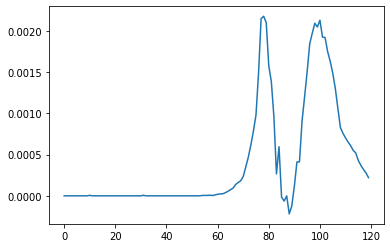

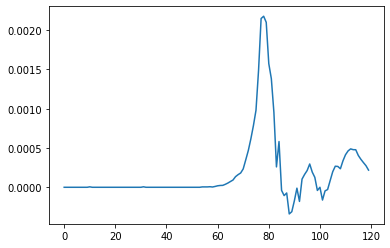

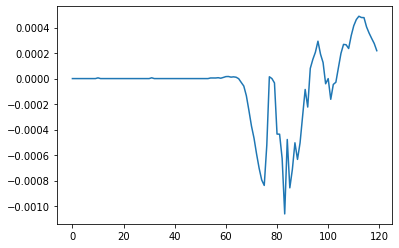

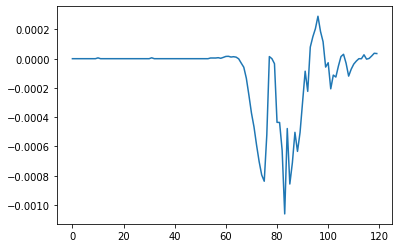

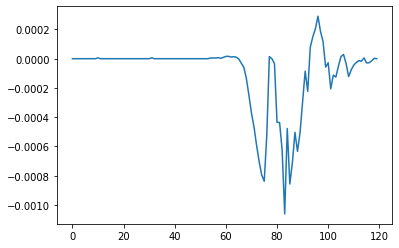

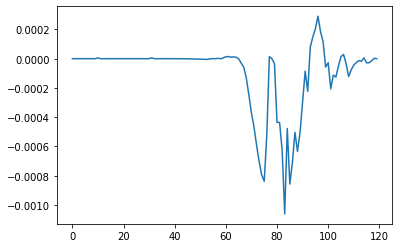

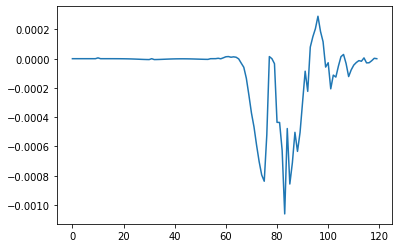

In [72]:
f = extractPartByYear(prenoms, ['MATTHIEU'])[0]
dico = init_dictionary()

MP_i, MP_c, MP_cste = matching_pursuit(f, dico, it_limit=8)
approx = np.zeros(120)
for i in range(len(MP_i)):
    approx += dico[MP_i[i]]*MP_c[i]
approx *= MP_cste/np.mean(approx)
X = [x for x in range(1900,2020)]
plt.plot(X, f)
plt.plot(X,approx)
plt.show()

# D'autres évolutions intéressantes

## La longueur des prénoms

Le prénom ABA a été donné 7214.0 fois à des hommes pour des années indéfinies
Le prénom ABA a été donné 5976.0 fois à des femmes pour des années indéfinies


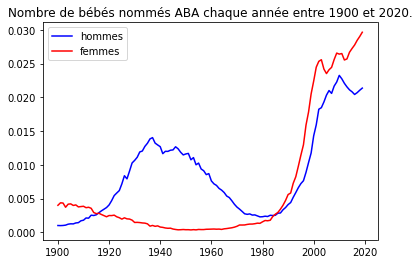

In [11]:
def pickNamesByLength(database, n) :
    L = []
    for name in database['preusuel']:
        if len(str(name))==n and not(name in L):
            L.append(name)
    return L

pitits = pickNamesByLength(prenoms, 3)
#plotPartByYearList(prenoms, pitits)

In [12]:
prenoms['longueur']= [len(str(prenoms.iloc[i][1])) for i in range(652056)]
prenoms

sexe        preusuel annais  nombre  longueur
0          1  _PRENOMS_RARES   1900    1250        14
1          1  _PRENOMS_RARES   1901    1340        14
2          1  _PRENOMS_RARES   1902    1329        14
3          1  _PRENOMS_RARES   1903    1285        14
4          1  _PRENOMS_RARES   1904    1427        14
...      ...             ...    ...     ...       ...
652051     2           ZYNEB   2016       6         5
652052     2           ZYNEB   2017       6         5
652053     2           ZYNEB   2018       5         5
652054     2           ZYNEB   2019       7         5
652055     2           ZYNEB   XXXX      19         5

[652056 rows x 5 columns]

<AxesSubplot:xlabel='annais'>

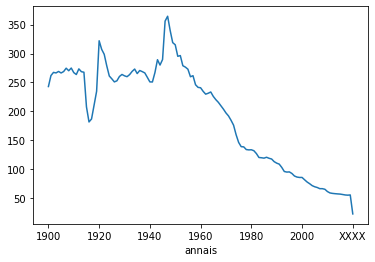

In [23]:
prenoms.groupby('annais').nombre.mean().plot()

In [42]:
prenoms.groupby('annais').longueur.mean().plot()

<AxesSubplot:xlabel='annais'>

<AxesSubplot:xlabel='annais'>

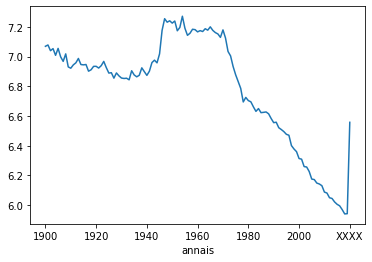

In [46]:
prenomsless = prenoms[prenoms['preusuel']!="_PRENOMS_RARES"]
prenomsless.groupby('annais').longueur.mean().plot()

## D'autres exemples

Les prénoms ARTHUR,... ont été donnés 269.0 fois à des hommes pour des années indéfinies
Les prénoms ARTHUR,... ont été donnés 339.0 fois à des femmes pour des années indéfinies


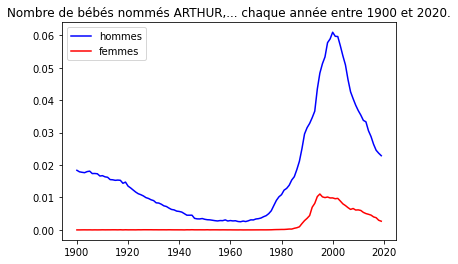

In [58]:
classe = ["ARTHUR", "BAPTISTE", "CHARLES", "CLÉMENT", "CLEMENT", "DYLAN", "ENZO", "ÉTIENNE", "ETIENNE", "FÉLIX", "FLORENT", "HUGO", "IGOR", "ISSEÏNIE", "LUDMILA", "MANON", "MATTHIEU", "PHILÉMON", "PHILEMON", "QUENTIN", "THÉO", "THEO"]
plotPartByYearList(prenoms, classe)

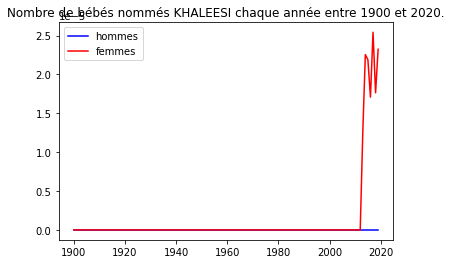

Le prénom DAENERYS a été donné 3.0 fois à des femmes pour des années indéfinies


Le prénom JON a été donné 10.0 fois à des hommes pour des années indéfinies


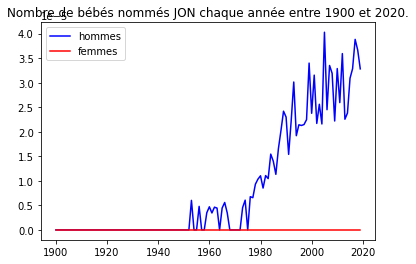

Le prénom SANSA a été donné 1.0 fois à des femmes pour des années indéfinies


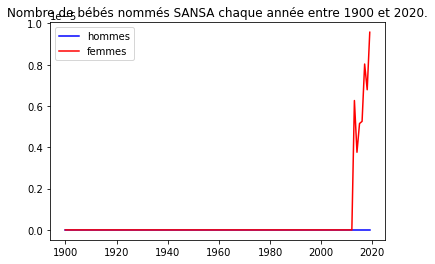

Le prénom ARYA a été donné 26.0 fois à des hommes pour des années indéfinies
Le prénom ARYA a été donné 22.0 fois à des femmes pour des années indéfinies


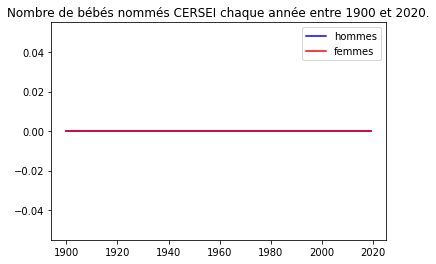

In [64]:
got = [["KHALEESI"], ["DAENERYS"], ["JON"], ["SANSA"], ["ARYA"]]
for prenom in got :
    plotPartByYearList(prenoms, prenom)
    plt.show()

Le prénom HARRY a été donné 13.0 fois à des hommes pour des années indéfinies


Le prénom HERMIONE a été donné 26.0 fois à des femmes pour des années indéfinies


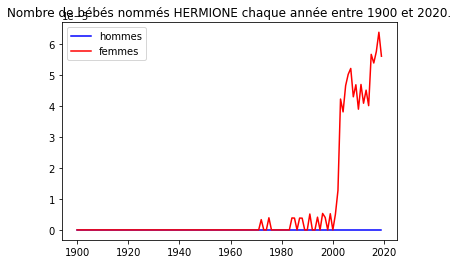

Le prénom RON a été donné 25.0 fois à des hommes pour des années indéfinies


Le prénom NEVILLE a été donné 33.0 fois à des hommes pour des années indéfinies


Le prénom LUNA a été donné 23.0 fois à des femmes pour des années indéfinies


Le prénom GINNY a été donné 24.0 fois à des femmes pour des années indéfinies


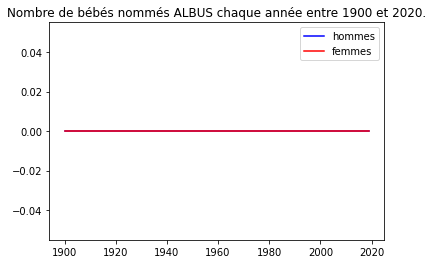

In [65]:
hp = [["HARRY"], ["HERMIONE"], ["RON"], ["LUNA"], ["GINNY"]]
for prenom in hp :
    plotPartByYearList(prenoms, prenom)
    plt.show()

Les prénoms GALADRIEL GALADRIELLE ont été donnés 58.0 fois à des femmes pour des années indéfinies


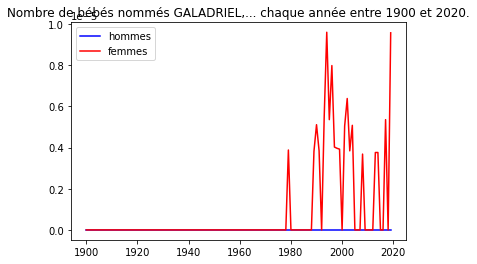

Les prénoms ARWEN ARWENN ont été donnés 18.0 fois à des hommes pour des années indéfinies
Les prénoms ARWEN ARWENN ont été donnés 22.0 fois à des femmes pour des années indéfinies


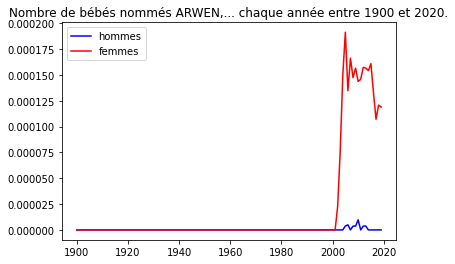

Les prénoms EOWYN ÉOWYN ont été donnés 12.0 fois à des femmes pour des années indéfinies


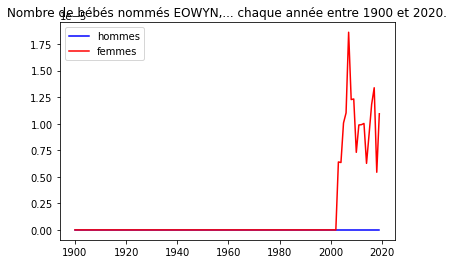

Le prénom BEREN a été donné 7.0 fois à des hommes pour des années indéfinies
Le prénom BEREN a été donné 7.0 fois à des femmes pour des années indéfinies


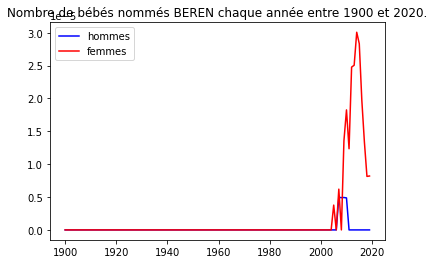

In [67]:
lotr = [["GALADRIEL", "GALADRIELLE"], ["ARWEN", "ARWENN"], ["EOWYN", "ÉOWYN"], ["BEREN"]]
for prenom in lotr :
    plotPartByYearList(prenoms, prenom)
    plt.show()

Le prénom ARTHUR a été donné 35.0 fois à des femmes pour des années indéfinies


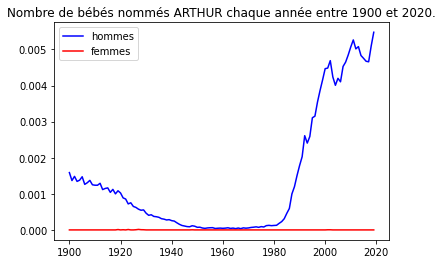

Les prénoms GUENIEVRE GUENIÈVRE ont été donnés 50.0 fois à des femmes pour des années indéfinies


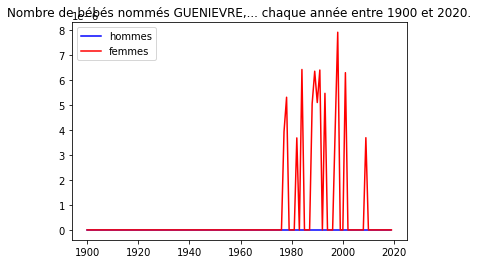

Le prénom TRISTAN a été donné 25.0 fois à des hommes pour des années indéfinies


Les prénoms ISEULT YSEULT ont été donnés 91.0 fois à des femmes pour des années indéfinies


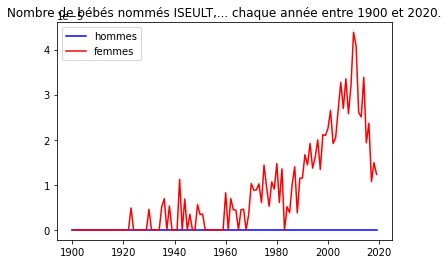

Le prénom GALAAD a été donné 11.0 fois à des hommes pour des années indéfinies


Le prénom PERCEVAL a été donné 25.0 fois à des hommes pour des années indéfinies


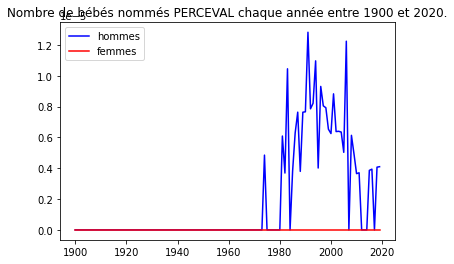

Le prénom GAUVIN a été donné 22.0 fois à des hommes pour des années indéfinies


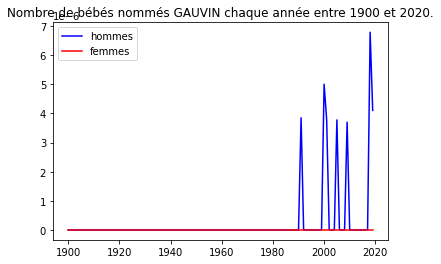

Le prénom MERLIN a été donné 22.0 fois à des hommes pour des années indéfinies


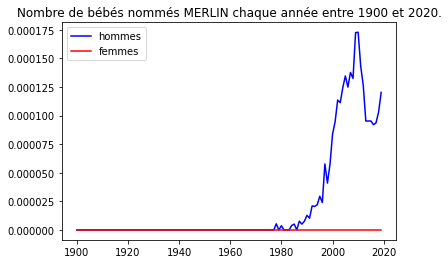

Les prénoms MORGANE MORGAN ont été donnés 33.0 fois à des hommes pour des années indéfinies
Les prénoms MORGANE MORGAN ont été donnés 20.0 fois à des femmes pour des années indéfinies


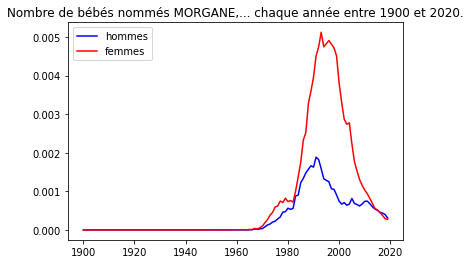

Les prénoms VIVIANE VIVIANNE ont été donnés 39.0 fois à des femmes pour des années indéfinies


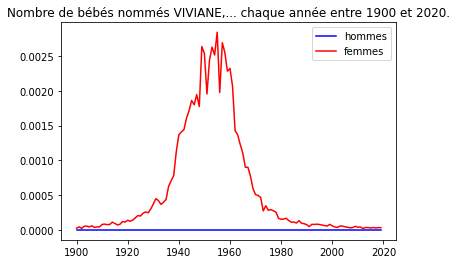

Les prénoms YVAIN IVAIN ont été donnés 42.0 fois à des hommes pour des années indéfinies


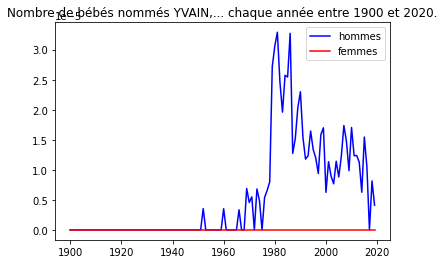

In [68]:
legendearthurienne = [["ARTHUR"], ["GUENIEVRE", "GUENIÈVRE"], ["TRISTAN"], ["ISEULT", "YSEULT"], ["GALAAD"], ["PERCEVAL"], ["GAUVIN"], ["MERLIN"], ["MORGANE", "MORGAN"], ["VIVIANE", "VIVIANNE"], ["YVAIN", "IVAIN"]]
for prenom in legendearthurienne :
    plotPartByYearList(prenoms, prenom)
    plt.show()

Le prénom HYACINTHE a été donné 2.0 fois à des hommes pour des années indéfinies
Le prénom HYACINTHE a été donné 15.0 fois à des femmes pour des années indéfinies


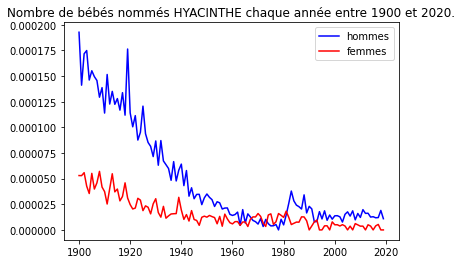

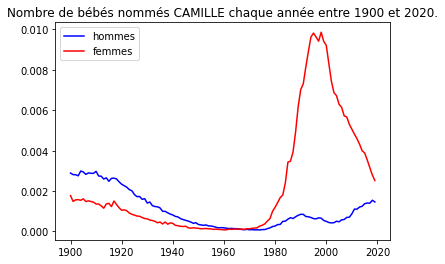

Les prénoms SASHA SACHA ont été donnés 51.0 fois à des hommes pour des années indéfinies
Les prénoms SASHA SACHA ont été donnés 31.0 fois à des femmes pour des années indéfinies


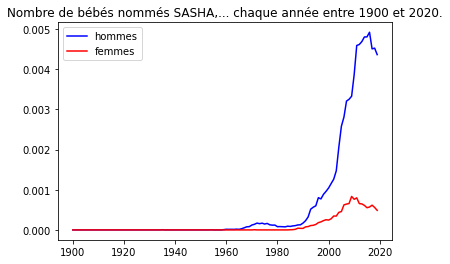

Les prénoms NOA NOAH ont été donnés 30.0 fois à des hommes pour des années indéfinies
Les prénoms NOA NOAH ont été donnés 37.0 fois à des femmes pour des années indéfinies


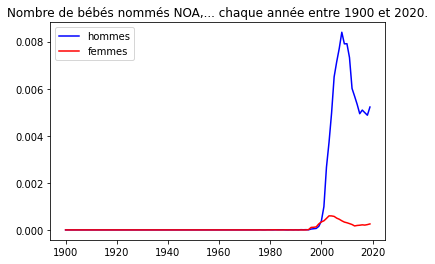

Le prénom LOU a été donné 6.0 fois à des hommes pour des années indéfinies
Le prénom LOU a été donné 23.0 fois à des femmes pour des années indéfinies


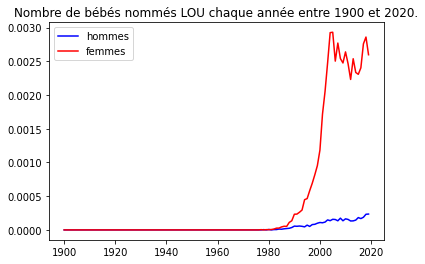

Le prénom EDEN a été donné 19.0 fois à des hommes pour des années indéfinies
Le prénom EDEN a été donné 11.0 fois à des femmes pour des années indéfinies


Le prénom CHARLIE a été donné 14.0 fois à des hommes pour des années indéfinies
Le prénom CHARLIE a été donné 27.0 fois à des femmes pour des années indéfinies


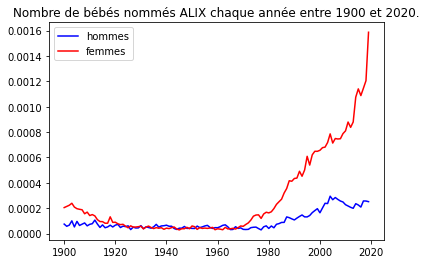

Les prénoms SWAN SWANN ont été donnés 17.0 fois à des hommes pour des années indéfinies
Les prénoms SWAN SWANN ont été donnés 32.0 fois à des femmes pour des années indéfinies


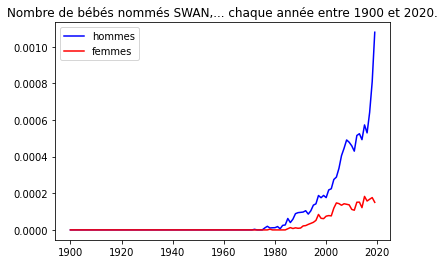

In [70]:
mixtes = [["HYACINTHE"], ["CAMILLE"], ["SASHA", "SACHA"], ["NOA", "NOAH"], ["LOU"], ["EDEN"], ["CHARLIE"], ["ALIX"], ["SWAN", "SWANN"]]
for prenom in mixtes :
    plotPartByYearList(prenoms, prenom)
    plt.show()